In [3]:
from fastai.vision.all import *

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.vision.widgets import FileUpload, ImageClassifierCleaner
sns.__version__


'0.11.1'

In [12]:
path = Path.cwd()/'../datasets/Tomato_leaf'

In [13]:
tomato_leaf = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    item_tfms=Resize(400),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.3, seed=42)
)

In [14]:
dls = tomato_leaf.dataloaders(path)

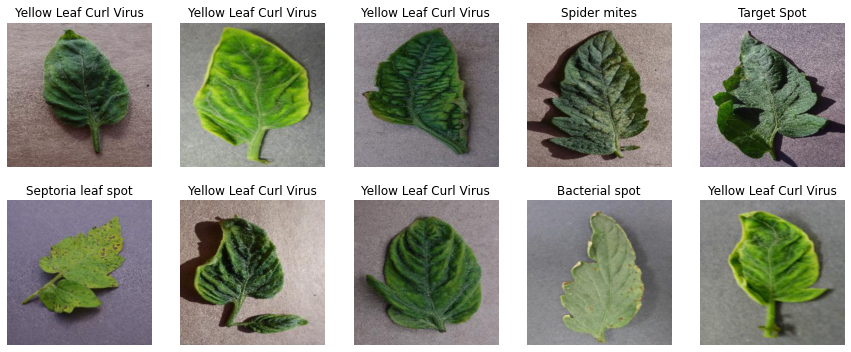

In [15]:
dls.train.show_batch(max_n=10, nrows=2)

In [16]:
model = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

In [17]:
model.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.476568,0.167499,0.059655,0.940345,04:41


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.132173,0.057522,0.018906,0.981094,06:18
1,0.047640,0.045607,0.014501,0.985499,06:17
2,0.041754,0.061504,0.017438,0.982562,06:17
3,0.054870,0.064743,0.017988,0.982012,06:17
4,0.036408,0.061316,0.019090,0.980910,06:17
5,0.043974,0.045476,0.013032,0.986968,06:17
6,0.027200,0.030656,0.008627,0.991373,06:17
7,0.024996,0.027657,0.009728,0.990272,06:17
8,0.021803,0.074245,0.019640,0.980360,06:17
9,0.017075,0.082783,0.020191,0.979809,06:17


In [18]:
interp = ClassificationInterpretation.from_learner(model)

In [19]:
df = pd.DataFrame(data=interp.confusion_matrix(), columns=model.dls.vocab)
df.style.set_properties().background_gradient('YlGnBu')

,Bacterial spot,Early blight,Healthy,Late blight,Leaf Mold,Mosaic virus,Septoria leaf spot,Spider mites,Target Spot,Yellow Leaf Curl Virus
0,633,0,0,0,0,0,0,0,0,0
1,0,281,0,3,0,0,0,0,0,0
2,0,0,472,0,0,0,0,0,0,0
3,0,1,0,573,1,0,0,0,0,0
4,0,1,0,0,313,0,0,0,0,0
5,0,0,0,0,0,129,0,0,0,0
6,0,1,0,0,0,0,525,0,0,0
7,0,0,0,0,0,0,0,476,1,0
8,0,0,0,2,0,0,0,2,420,0
9,0,0,0,0,0,0,0,0,0,1614


In [20]:
path = Path.cwd()/'../models/tomato.pkl'
model.export(path)

In [5]:
learner = load_learner(Path.cwd()/'../models/tomato.pkl')
btn_upload = FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

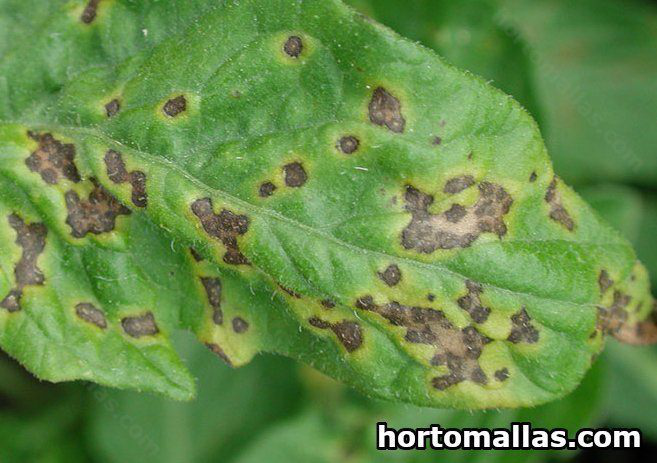

In [16]:
img = btn_upload.data[0]
img = PILImage.create(img)
img


In [17]:
learner.predict(img)

('Septoria leaf spot',
 tensor(6),
 tensor([2.2861e-08, 9.2177e-02, 2.2372e-07, 1.0396e-05, 3.3338e-08, 1.3071e-08,
         9.0781e-01, 1.7417e-11, 2.7540e-08, 5.6007e-11]))

In [1]:
cleaner = ImageClassifierCleaner(model)
clearner

NameError: name 'ImageClassifierCleaner' is not defined